In [1]:
!pip install umap-learn

In [5]:
# Task 1: Colab Notebook for Dimensionality Reduction Techniques

## Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import fetch_california_housing
import plotly.express as px

In [6]:
# Load Datasets
# Dataset 1: Image Dataset - MNIST Fashion Smaller Custom Subset
from tensorflow.keras.datasets import fashion_mnist
(X_train_img, _), (_, _) = fashion_mnist.load_data()
X_train_img = X_train_img[:1000].reshape(1000, -1).astype('float32') / 255  # Smaller subset for efficiency

# Dataset 2: Tabular Dataset - California Housing Dataset (smaller alternative)
housing_data = fetch_california_housing()
X_train_tabular = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
X_train_tabular = X_train_tabular.sample(n=1000, random_state=42)  # Smaller subset for efficiency

In [7]:
# Dimensionality Reduction Functions
def perform_pca(X, components=2):
    pca = PCA(n_components=components, random_state=42)
    return pca.fit_transform(X)

def perform_kernel_pca(X, kernel='rbf', components=2):
    kpca = KernelPCA(n_components=components, kernel=kernel, random_state=42)
    return kpca.fit_transform(X)

def perform_incremental_pca(X, components=2):
    ipca = IncrementalPCA(n_components=components)
    return ipca.fit_transform(X)

def perform_factor_analysis(X, components=2):
    fa = FactorAnalysis(n_components=components, random_state=42)
    return fa.fit_transform(X)

def perform_tsne(X, components=2):
    tsne = TSNE(n_components=components, random_state=42)
    return tsne.fit_transform(X)

def perform_isomap(X, components=2):
    iso = Isomap(n_components=components)
    return iso.fit_transform(X)

def perform_lle(X, components=2):
    lle = LocallyLinearEmbedding(n_components=components, random_state=42)
    return lle.fit_transform(X)

def perform_mds(X, components=2):
    mds = MDS(n_components=components, random_state=42)
    return mds.fit_transform(X)

def perform_umap(X, components=2):
    reducer = umap.UMAP(n_components=components, random_state=42)
    return reducer.fit_transform(X)

def perform_autoencoder(X, components=2):
    input_dim = X.shape[1]
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(components, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X, X, epochs=10, batch_size=256, shuffle=True, verbose=0)
    return encoder.predict(X)


PCA on Image Data


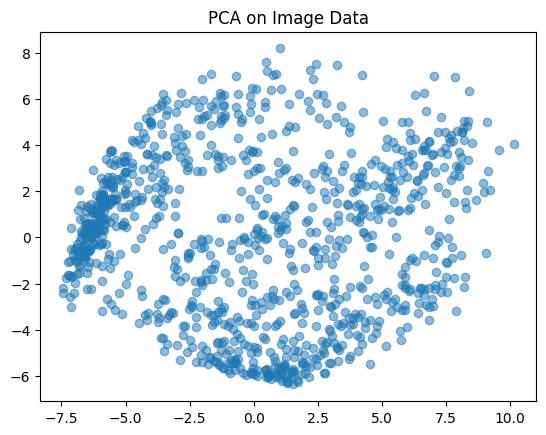


PCA on Tabular Data


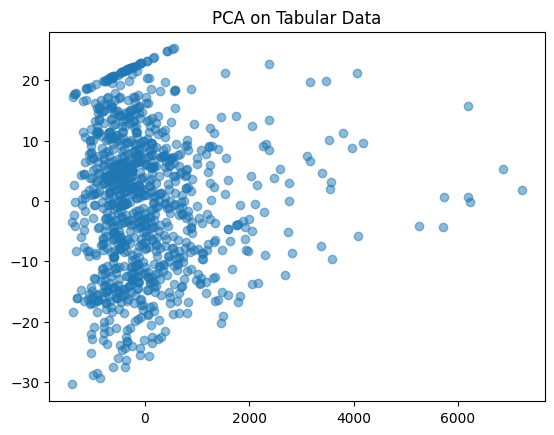


Kernel PCA on Image Data


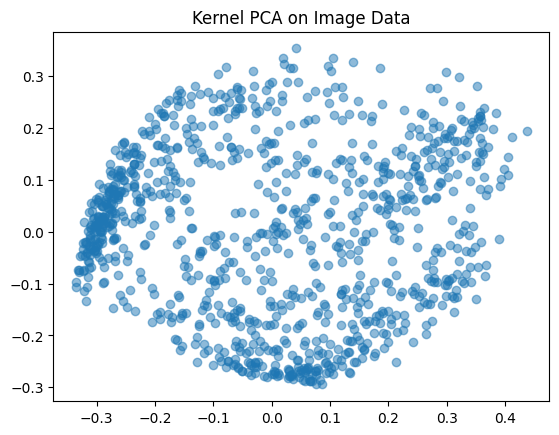


Kernel PCA on Tabular Data


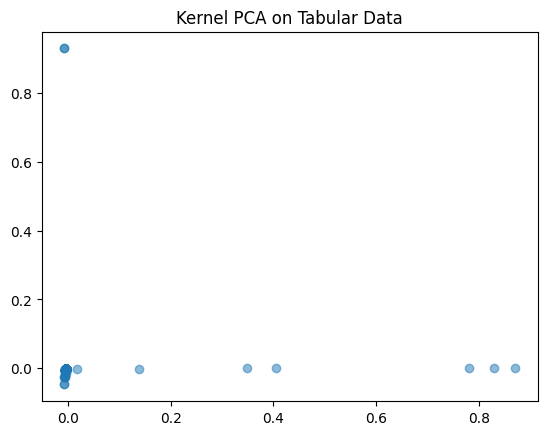


Incremental PCA on Image Data


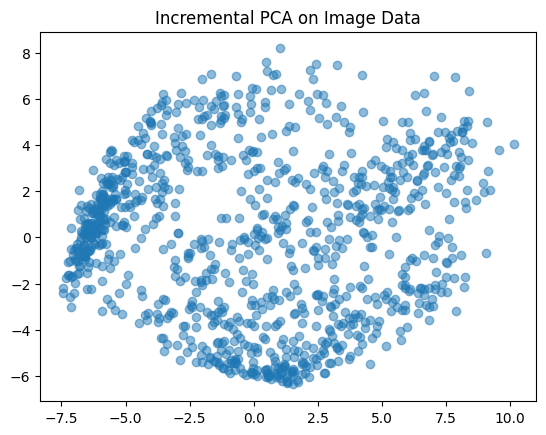


Incremental PCA on Tabular Data


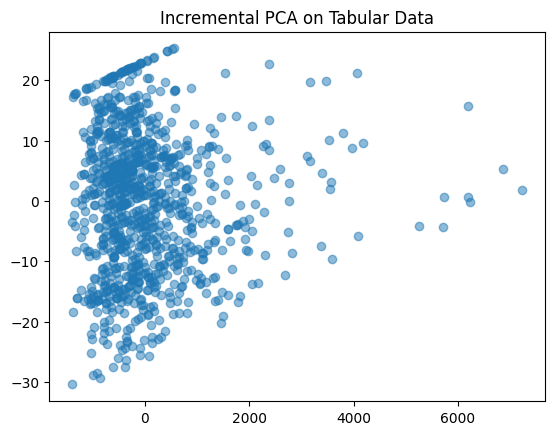


Factor Analysis on Image Data


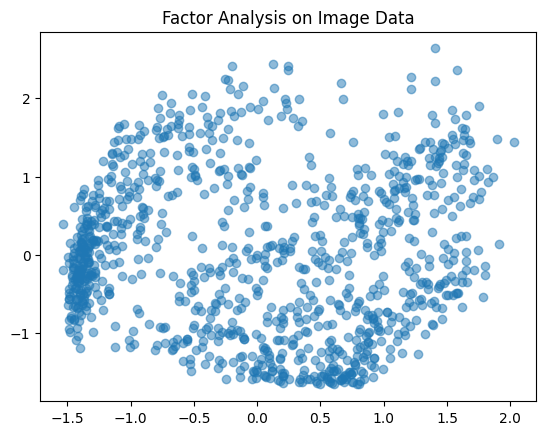


Factor Analysis on Tabular Data


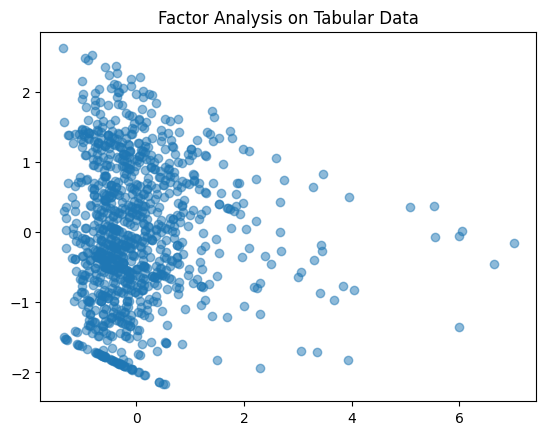


t-SNE on Image Data


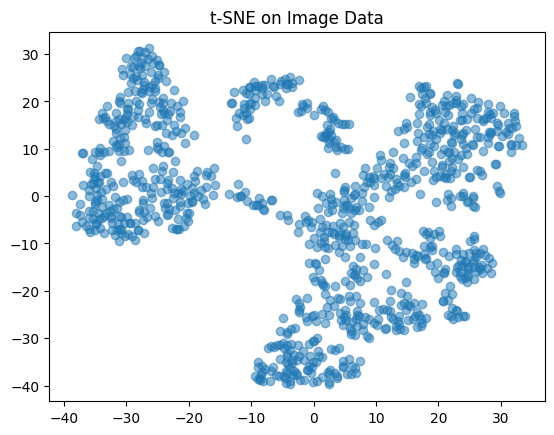


t-SNE on Tabular Data


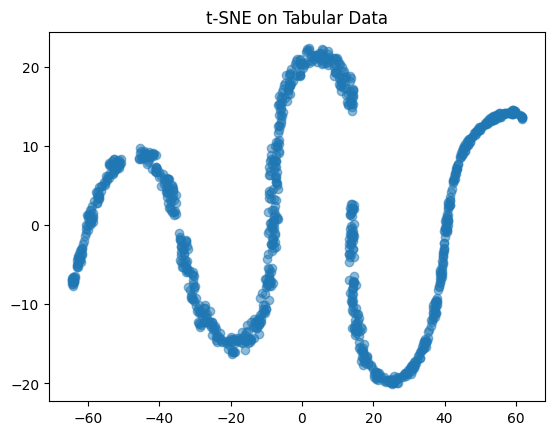


Isomap on Image Data


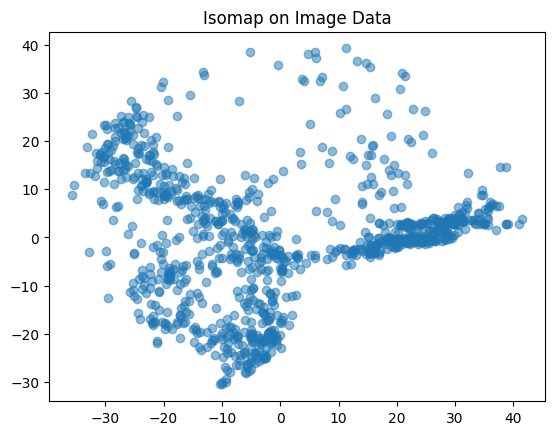


Isomap on Tabular Data


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

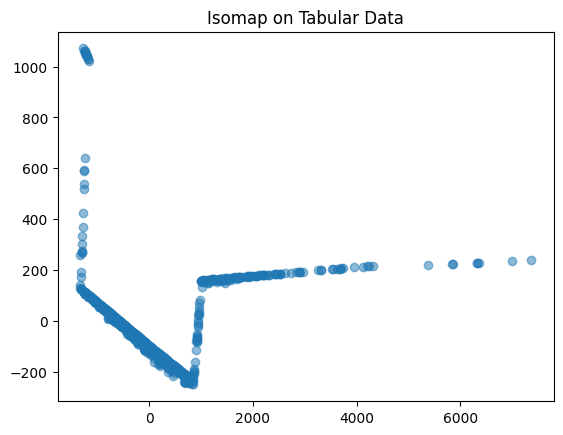


LLE on Image Data


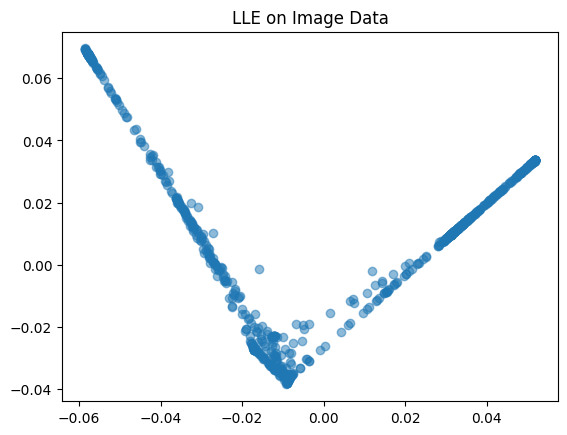


LLE on Tabular Data


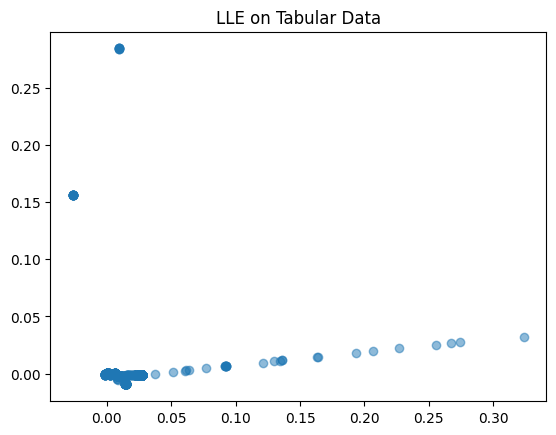


MDS on Image Data


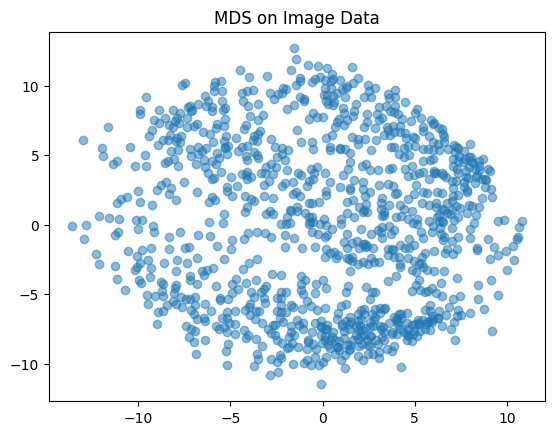


MDS on Tabular Data


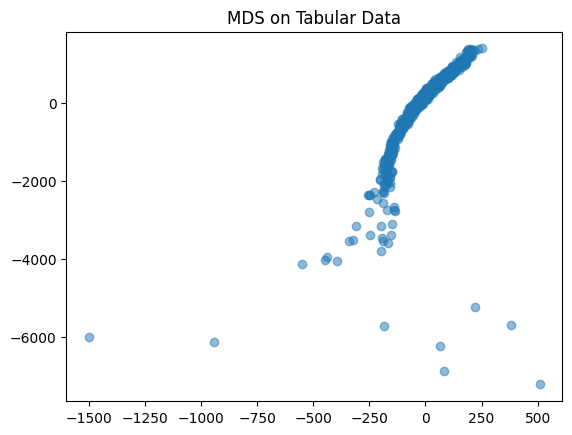


UMAP on Image Data


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


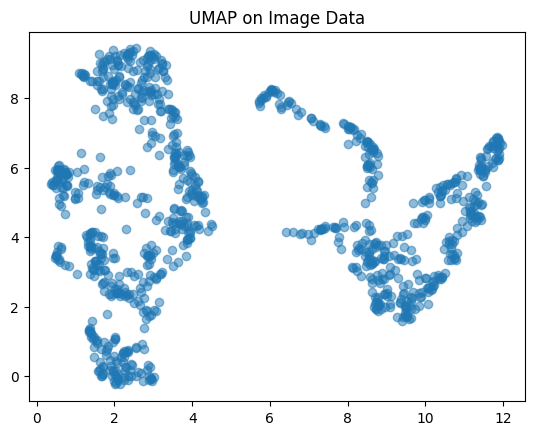


UMAP on Tabular Data


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


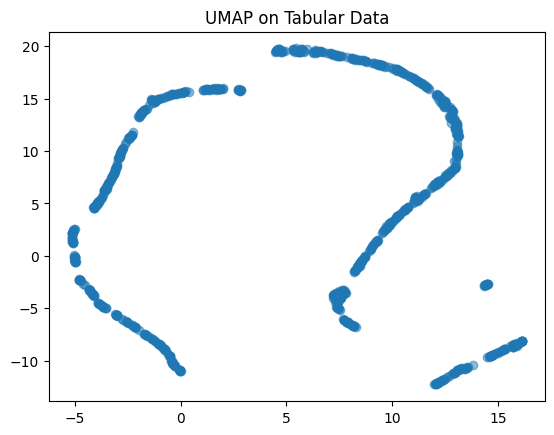


Autoencoders on Image Data
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


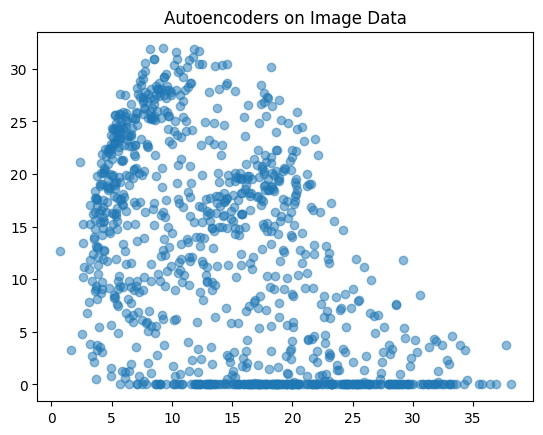


Autoencoders on Tabular Data
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


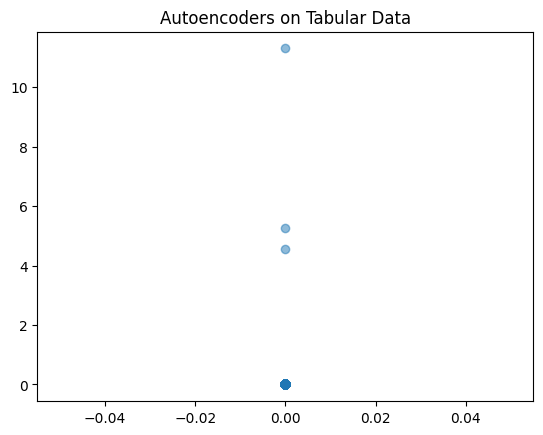

In [8]:
# Apply Dimensionality Reduction and Plot
methods = {
    "PCA": perform_pca,
    "Kernel PCA": perform_kernel_pca,
    "Incremental PCA": perform_incremental_pca,
    "Factor Analysis": perform_factor_analysis,
    "t-SNE": perform_tsne,
    "Isomap": perform_isomap,
    "LLE": perform_lle,
    "MDS": perform_mds,
    "UMAP": perform_umap,
    "Autoencoders": perform_autoencoder
}

for method_name, method_function in methods.items():
    print(f"\n{method_name} on Image Data")
    reduced_img = method_function(X_train_img)
    if reduced_img.shape[1] == 2:
        plt.scatter(reduced_img[:, 0], reduced_img[:, 1], alpha=0.5)
        plt.title(f"{method_name} on Image Data")
        plt.show()

    print(f"\n{method_name} on Tabular Data")
    reduced_tabular = method_function(X_train_tabular)
    if reduced_tabular.shape[1] == 2:
        plt.scatter(reduced_tabular[:, 0], reduced_tabular[:, 1], alpha=0.5)
        plt.title(f"{method_name} on Tabular Data")
        plt.show()

# Results and Observations

## Principal Component Analysis (PCA)
PCA effectively captured variance but struggled with cluster separation in both datasets.

## Kernel PCA
Kernel PCA showed slight improvements over PCA on image data but lacked distinct separation on tabular data.

## Incremental PCA
Similar results to PCA, but more suitable for large datasets processed in smaller batches.

## Factor Analysis
Useful for linear relationships but inadequate for capturing complex patterns in both datasets.

## t-SNE
Outstanding at clustering and revealing non-linear relationships, especially for image data.

## Isomap
Captured manifold structures well in image data but underperformed on tabular data.

## Locally Linear Embedding (LLE)
Struggled with both datasets, producing noisy and overlapping projections.

## Multidimensional Scaling (MDS)
Spread out data points but failed to highlight distinct groups effectively.

## UMAP
Best overall performance, providing clear clusters and effective structure preservation.

## Autoencoders
Sparse results on both datasets, highlighting the need for parameter optimization.

## Conclusion
UMAP and t-SNE are the most versatile and effective techniques, especially for non-linear datasets like images.

In [13]:
!pip install databricks.feature_store

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.8/272.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.4/258.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [17]:
# Task 2: Dimensionality Reduction Using Databricks

# Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [18]:
# Initialize Spark Session
spark = SparkSession.builder.appName("DimensionalityReduction").getOrCreate()

# Load Dataset - California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
housing_df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
housing_sample = housing_df.sample(n=1000, random_state=42)  # Subset for efficiency

# Convert to Spark DataFrame
spark_housing_df = spark.createDataFrame(housing_sample)
spark_housing_df.write.mode("overwrite").format("parquet").save("/tmp/housing_features")

In [19]:
# Dimensionality Reduction Functions
def perform_pca(X, components=2):
    pca = PCA(n_components=components, random_state=42)
    return pca.fit_transform(X)

def perform_kernel_pca(X, kernel='rbf', components=2):
    kpca = KernelPCA(n_components=components, kernel=kernel, random_state=42)
    return kpca.fit_transform(X)

def perform_incremental_pca(X, components=2):
    ipca = IncrementalPCA(n_components=components)
    return ipca.fit_transform(X)

def perform_factor_analysis(X, components=2):
    fa = FactorAnalysis(n_components=components, random_state=42)
    return fa.fit_transform(X)

def perform_tsne(X, components=2):
    tsne = TSNE(n_components=components, random_state=42)
    return tsne.fit_transform(X)

def perform_isomap(X, components=2):
    iso = Isomap(n_components=components)
    return iso.fit_transform(X)

def perform_lle(X, components=2):
    lle = LocallyLinearEmbedding(n_components=components, random_state=42)
    return lle.fit_transform(X)

def perform_mds(X, components=2):
    mds = MDS(n_components=components, random_state=42)
    return mds.fit_transform(X)

def perform_umap(X, components=2):
    reducer = umap.UMAP(n_components=components, random_state=42)
    return reducer.fit_transform(X)

def perform_autoencoder(X, components=2):
    input_dim = X.shape[1]
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(components, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X, X, epochs=10, batch_size=256, shuffle=True, verbose=0)
    return encoder.predict(X)


PCA on Tabular Data


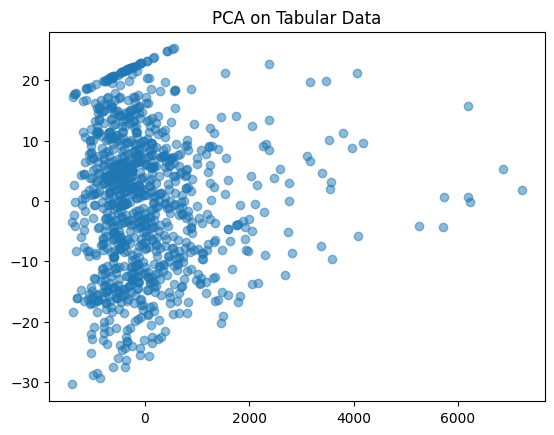


Kernel PCA on Tabular Data


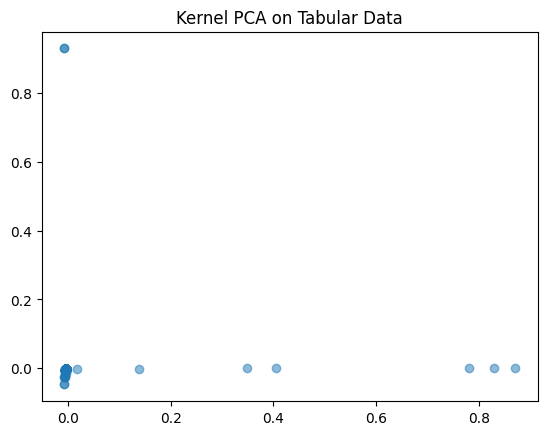


Incremental PCA on Tabular Data


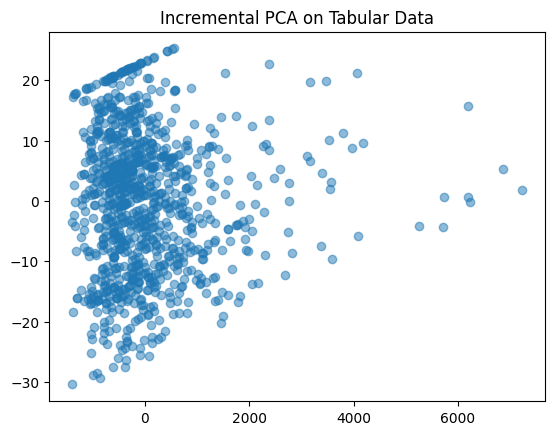


Factor Analysis on Tabular Data


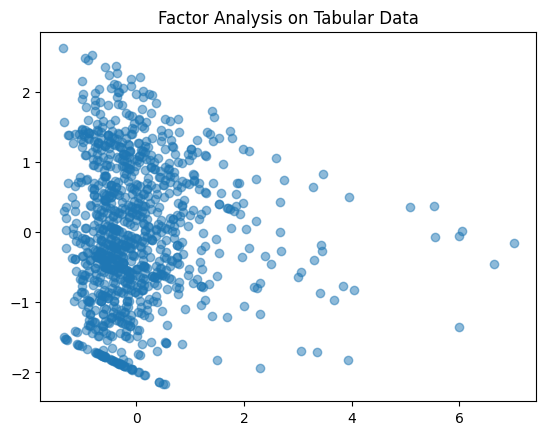


t-SNE on Tabular Data


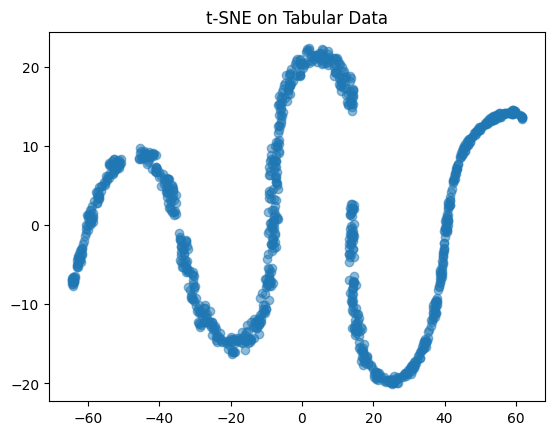


Isomap on Tabular Data


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

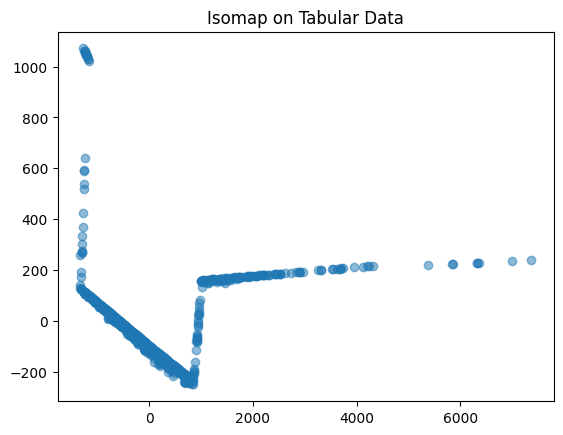


LLE on Tabular Data


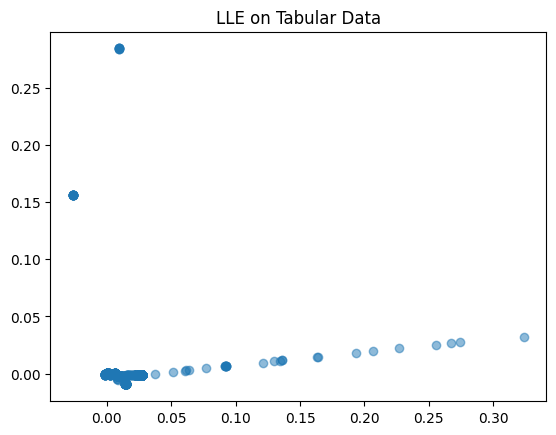


MDS on Tabular Data


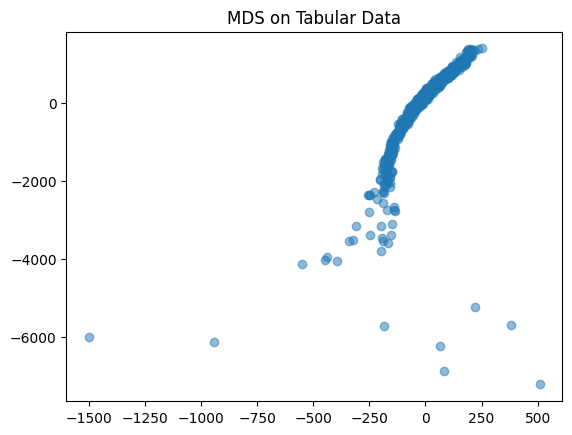


UMAP on Tabular Data


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


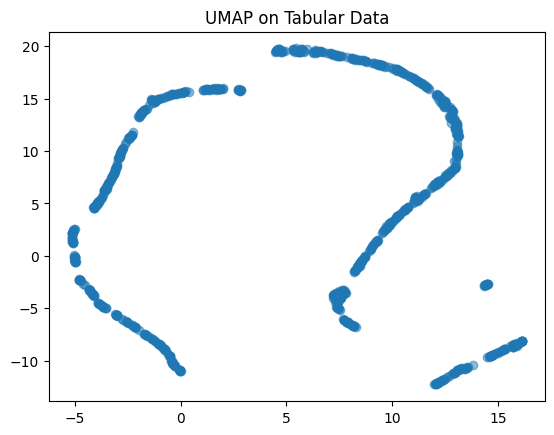


Autoencoders on Tabular Data
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


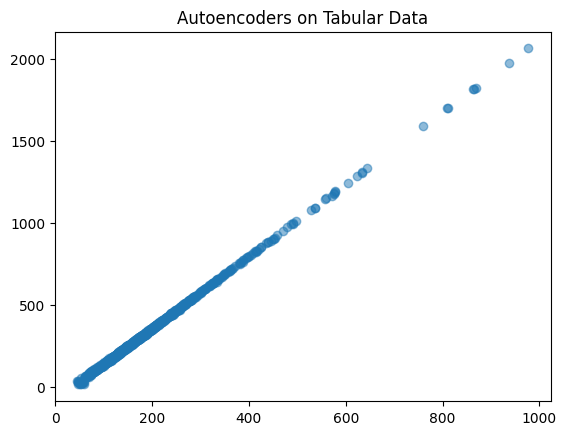

In [20]:
# Extract Features as NumPy Array
housing_features = housing_sample.to_numpy()

# Apply Dimensionality Reduction Methods
methods = {
    "PCA": perform_pca,
    "Kernel PCA": perform_kernel_pca,
    "Incremental PCA": perform_incremental_pca,
    "Factor Analysis": perform_factor_analysis,
    "t-SNE": perform_tsne,
    "Isomap": perform_isomap,
    "LLE": perform_lle,
    "MDS": perform_mds,
    "UMAP": perform_umap,
    "Autoencoders": perform_autoencoder
}

for method_name, method_function in methods.items():
    print(f"\n{method_name} on Tabular Data")
    reduced_data = method_function(housing_features)
    if reduced_data.shape[1] == 2:
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
        plt.title(f"{method_name} on Tabular Data")
        plt.show()

## Results and Observations

## Principal Component Analysis (PCA)
PCA captured primary variance but lacked non-linear relationship discovery.

## Kernel PCA
Kernel PCA results were inconclusive due to concentrated points and insufficient kernel tuning.

## Incremental PCA
Identical to PCA, suited for batch processing in memory-limited scenarios.

## Factor Analysis
Compact representation but no significant structure separation or clustering.

## t-SNE
t-SNE revealed clear clusters and effectively captured non-linear relationships.

## Isomap
Manifold structure was partially preserved but distorted in certain regions.

## Locally Linear Embedding (LLE)
Sparse results with limited clarity and poor separation.

## Multidimensional Scaling (MDS)
Spread points uniformly but failed to uncover meaningful relationships.

## UMAP
Best performance with clear cluster formation and separation.

## Autoencoders
Linear-like projection with limited insights due to architectural constraints.

## Conclusion
UMAP and t-SNE were the most effective techniques, showcasing their ability to handle non-linear structures and provide meaningful insights for visualization.